In [2]:
import pandas as pd
import datetime
from os import listdir
import os, os.path
from os.path import isfile, join
import numpy as np
import csv
import re
import pandas as pd
import pm4py
from pm4py.objects.conversion.log import converter as log_converter
from pm4py.objects.log.importer.xes import importer as xes_importer
from pm4py.objects.log.exporter.xes import exporter as xes_exporter
from pm4py.objects.log.util import dataframe_utils
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#df_categorias_autores=pd.read_csv("logCT2.csv",index_col=0)
df_categorias_autores=pd.read_csv("Log of analysis of time aspects.csv",index_col=0)
df_categorias_autores

,case:id,case:concept:name,concept:name,Variant,time:timestamp,Question,Report,Year,Category,Type,Tupla,Organization
0,A1 P2 BPI 2020,A1 P2 BPI 2020,Calculate cycle time,Calculate cycle time of the whole process for ...,2021-11-19 09:37:02.248560,P2,A1,2020,Academic,Analyze Cycle Time,A12020,TechnischeUniversitätBerlin
1,A1 P2 BPI 2020,A1 P2 BPI 2020,Compare cycle time,Compare cycle time,2021-11-19 10:37:02.248560,P2,A1,2020,Academic,Analyze Cycle Time,A12020,TechnischeUniversitätBerlin
2,A2 P2 BPI 2020,A2 P2 BPI 2020,Calculate cycle time,Get cycle time from the previous question,2021-11-19 11:37:02.248560,P2,A2,2020,Student,Analyze Cycle Time,A22020,FacultyofScienceUtrechtUniversity
3,A2 P2 BPI 2020,A2 P2 BPI 2020,Compare cycle time,Compare cycle time,2021-11-19 12:37:02.248560,P2,A2,2020,Student,Analyze Cycle Time,A22020,FacultyofScienceUtrechtUniversity
4,A7 P2 BPI 2020,A7 P2 BPI 2020,Calculate throughput,Calculate throughput,2021-11-19 13:37:02.248560,P2,A7,2020,Academic,Analyze Cycle Time,A72020,GermanResearchCenterforArtificialIntelligenceDFKI
...,...,...,...,...,...,...,...,...,...,...,...,...
943,A19 P1 BPI 2020,A19 P1 BPI 2020,Group traces,Group traces by year,2021-12-28 16:37:02.248560,P1,A19,2020,Professional,Manipulation,A192020,Sberbank
944,A19 P1 BPI 2020,A19 P1 BPI 2020,Group traces,Group traces by activities,2021-12-28 17:37:02.248560,P1,A19,2020,Professional,Manipulation,A192020,Sberbank
945,A19 P1 BPI 2020,A19 P1 BPI 2020,Calculate statistics,Calculate Statistics of activities,2021-12-28 18:37:02.248560,P1,A19,2020,Professional,Calculate statistics,A192020,Sberbank
946,A19 P1 BPI 2020,A19 P1 BPI 2020,Calculate throughput,Calculate throughput,2021-12-28 19:37:02.248560,P1,A19,2020,Professional,Analyze Cycle Time,A192020,Sberbank


In [4]:
len(df_categorias_autores['concept:name'].unique())

56

In [5]:
len(df_categorias_autores['Variant'].unique())

139

In [6]:
len(df_categorias_autores['case:concept:name'].unique())

126

In [7]:
#Operaciones por bpi

In [8]:
tipos_op_agrupado_años=df_categorias_autores.groupby("Year")['Type'].value_counts()

In [9]:
sumAños=[tipos_op_agrupado_años[tipos_op_agrupado_años.index.get_level_values('Year')==val].sum() for val in [2015,2017,2019,2020]]

In [10]:
for index,value in tipos_op_agrupado_años.items():
    if 2015 in index:
        tipos_op_agrupado_años[index]=(value/sumAños[0])*100
    elif 2017 in index:
        tipos_op_agrupado_años[index]=(value/sumAños[1])*100
    elif 2019 in index:
        tipos_op_agrupado_años[index]=(value/sumAños[2])*100
    elif 2020 in index:
        tipos_op_agrupado_años[index]=(value/sumAños[3])*100

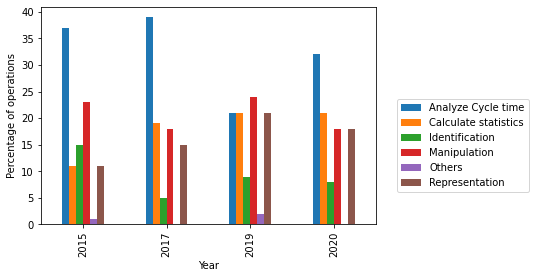

In [11]:
tipos_op_agrupado_años.unstack().plot(kind='bar')
plt.legend(["Analyze Cycle time","Calculate statistics","Identification","Manipulation","Others","Representation"],bbox_to_anchor = (1.05, 0.6))
plt.ylabel("Percentage of operations")
plt.show()

In [8]:
#Operaciones/variantes comunes entre BPI

In [12]:
type(df_categorias_autores['Year'][0])

numpy.int64

In [13]:
years1=[2015,2017,2019,2020]
years2=[2015,2017,2019,2020]
df = pd.DataFrame(index=[2015,2017,2019,2020],columns=[2015,2017,2019,2020])
for year1 in years1:
    operationsYear1=df_categorias_autores[df_categorias_autores["Year"]==year1]
    listaCoincidencias=[]
    for year2 in years2:
        operationsYear2=df_categorias_autores[df_categorias_autores["Year"]==year2]
        intersec=len(list(set(operationsYear1["concept:name"]).intersection(set(operationsYear2["concept:name"]))))
        if(year1==year2):
            intersec=0
        listaCoincidencias.append(intersec)
        
    df[year1]=listaCoincidencias

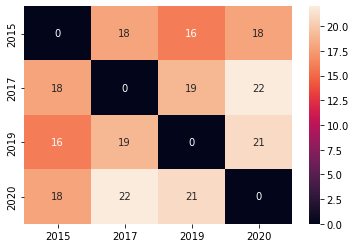

In [14]:
sns.heatmap(df, annot=True)

In [17]:
df2 = pd.DataFrame(index=[2015,2017,2019,2020],columns=[2015,2017,2019,2020])
for year1 in years1:
    operationsYear1=df_categorias_autores[df_categorias_autores["Year"]==year1]
    listaCoincidencias=[]
    for year2 in years2:
        operationsYear2=df_categorias_autores[df_categorias_autores["Year"]==year2]
        intersec=len(list(set(operationsYear1["Variant"]).intersection(set(operationsYear2["Variant"]))))
        if(year1==year2):
            intersec=0
        listaCoincidencias.append(intersec)
        
    df2[year1]=listaCoincidencias

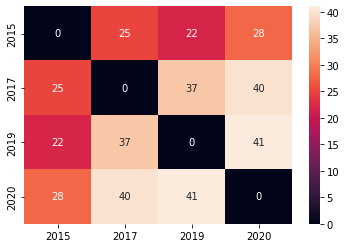

In [18]:
sns.heatmap(df2, annot=True)

In [ ]:
#------------------------------------------------------------------------------------------------------------------------------

In [ ]:
#Pair comparison per bpi

In [30]:
def jaccardIndex(list1,list2):
    set1=set(list1)
    set2=set(list2)
    intersection = set1.intersection(set2)
    tamIntersection=len(list(intersection))
    union = set1.union(set2)
    tamUnion=len(list(union))
    similitud=float(tamIntersection)/tamUnion
    return similitud

In [31]:
def overlapIndex(list1,list2):
    set1=set(list1)
    set2=set(list2)
    intersection = set1.intersection(set2)
    len1=len(list(set1))
    len2=len(list(set2))
    overlapIndex=float(len(list(intersection)))/min([len1,len2])
    return overlapIndex

In [32]:
def sorensenIndex(list1,list2):
    set1=set(list1)
    set2=set(list2)
    intersection = set1.intersection(set2)
    len1=len(list(set1))
    len2=len(list(set2))
    sorensenIndex=float(2*len(list(intersection)))/(len1+len2)
    return sorensenIndex

In [20]:
df_grouped_year=df_categorias_autores.groupby(by="Year")

In [35]:
years=list(df_grouped_year.groups.keys())

In [41]:
df_grouped_year.get_group(2015).head()

,case:id,case:concept:name,concept:name,Variant,time:timestamp,Question,Report,Year,Category,Type,Tupla,Organization
152,A2 P5 BPI 2015,A2 P5 BPI 2015,Calculate cycle time,Calculate cycle time of the whole process for ...,2021-11-25 17:37:02.248560,P5,A2,2015,Student,Analyze Cycle Time,A22015,UniversityofTartu
153,A2 P5 BPI 2015,A2 P5 BPI 2015,Filter events,Filter events by cycle time,2021-11-25 18:37:02.248560,P5,A2,2015,Student,Manipulation,A22015,UniversityofTartu
154,A2 P5 BPI 2015,A2 P5 BPI 2015,Represent histograms,Represent histograms of cycle time,2021-11-25 19:37:02.248560,P5,A2,2015,Student,Representation,A22015,UniversityofTartu
155,A2 P5 BPI 2015,A2 P5 BPI 2015,Identify bottlenecks,Identify activities as bottlenecks applying te...,2021-11-25 20:37:02.248560,P5,A2,2015,Student,Analyze Cycle Time,A22015,UniversityofTartu
156,A3 P5 BPI 2015,A3 P5 BPI 2015,Group activities,Group activities by sub-processes,2021-11-25 21:37:02.248560,P5,A3,2015,Professional,Manipulation,A32015,KPMGAdvisory


In [140]:
dict_df_analysis={"parAnalisis":[],"Categories":[],"Jaccard index":[],"Sorensen index":[],"Overlap index":[]}
df_analisis_similarity=pd.DataFrame.from_dict(dict_df_analysis)

parAnalysis=[]
categories=[]
indexSorensen=[]
indexJaccard=[]
indexOverlap=[]               
for i in range(len(years)):# para cada año (2015,2017,2019,2020)
    year=years[i] #sacamos un año
    df_i=df_grouped_year.get_group(year)#obtenemos su correspodiente df del año year
    lista_ids_i=df_i['case:concept:name'].unique().tolist()#lista ids del df_i
#     parAnalysis=[]
#     categories=[]
#     indexSorensen=[]
#     indexJaccard=[]
#     indexOverlap=[]
    for j in range(len(years)):#quitar i+1 si quieres comparar dentro del mismo año
        
        year2=years[j]#obtenemos el df de otro año
        df_j=df_grouped_year.get_group(year2)#obtenemos el correspodiente df del año year2
        lista_ids_j=df_j['case:concept:name'].unique().tolist()#lista ids del df_j
        
        for x in range(len(lista_ids_i)-1):#para cada índice de los case:concept:names de un año
            idx=lista_ids_i[x]#sacamos un case:concept:name
            operacionesIdent1=df_i[df_i['case:concept:name']==idx]['concept:name'].unique()#nos quedamos con sus operaciones
            if year==year2:
                ind=x+1
            else:
                ind=0
            #las operaciones de cada case:concept:name de i se comparan con las operaciones de cada case:concept name de j
            for y in range(ind,len(lista_ids_j)-1): #para cada case:concept:name del otro año (quitar x+1 si quieres comparar mismo año)
   
                idy=lista_ids_j[y]#sacamos su id y
                operacionesIdent2=df_j[df_j['case:concept:name']==idy]['concept:name'].unique() #nos quedamos con las operaciones del idy  
                categories.append(str(year)+" - "+str(year2))
                #calculamos cada indice y se añade a la lista
                indexSorensen.append(sorensenIndex(operacionesIdent1,operacionesIdent2))
                indexJaccard.append(jaccardIndex(operacionesIdent1,operacionesIdent2))
                indexOverlap.append(overlapIndex(operacionesIdent1,operacionesIdent2))
                print(idx+"-"+idy)
                print()
                parAnalysis.append(idx+"-"+idy)
                
dict_df={"parAnalisis":parAnalysis,"Categories":categories,"Jaccard index":indexJaccard,"Sorensen index":indexSorensen,"Overlap index":indexOverlap}
df_analisis=pd.DataFrame.from_dict(dict_df)
#print(df_analisis)
df_analisis_similarity=pd.concat([df_analisis_similarity,df_analisis],ignore_index=True)

A2 P5 BPI 2015-A3 P5 BPI 2015

A2 P5 BPI 2015-A4 P5 BPI 2015

A2 P5 BPI 2015-A7 P5 BPI 2015

A2 P5 BPI 2015-A8 P5 BPI 2015

A2 P5 BPI 2015-A9 P5 BPI 2015

A2 P5 BPI 2015-A6 P5 BPI 2015

A2 P5 BPI 2015-A1 P5 BPI 2015

A3 P5 BPI 2015-A4 P5 BPI 2015

A3 P5 BPI 2015-A7 P5 BPI 2015

A3 P5 BPI 2015-A8 P5 BPI 2015

A3 P5 BPI 2015-A9 P5 BPI 2015

A3 P5 BPI 2015-A6 P5 BPI 2015

A3 P5 BPI 2015-A1 P5 BPI 2015

A4 P5 BPI 2015-A7 P5 BPI 2015

A4 P5 BPI 2015-A8 P5 BPI 2015

A4 P5 BPI 2015-A9 P5 BPI 2015

A4 P5 BPI 2015-A6 P5 BPI 2015

A4 P5 BPI 2015-A1 P5 BPI 2015

A7 P5 BPI 2015-A8 P5 BPI 2015

A7 P5 BPI 2015-A9 P5 BPI 2015

A7 P5 BPI 2015-A6 P5 BPI 2015

A7 P5 BPI 2015-A1 P5 BPI 2015

A8 P5 BPI 2015-A9 P5 BPI 2015

A8 P5 BPI 2015-A6 P5 BPI 2015

A8 P5 BPI 2015-A1 P5 BPI 2015

A9 P5 BPI 2015-A6 P5 BPI 2015

A9 P5 BPI 2015-A1 P5 BPI 2015

A6 P5 BPI 2015-A1 P5 BPI 2015

A2 P5 BPI 2015-A1 P1 BPI 2017

A2 P5 BPI 2015-A2 P1 BPI 2017

A2 P5 BPI 2015-A5 P1 BPI 2017

A2 P5 BPI 2015-A6 P1 BPI 2017

A2 P5 BP

A4 P5 BPI 2015-A25 P4 BPI 2020

A4 P5 BPI 2015-A26 P4 BPI 2020

A4 P5 BPI 2015-A28 P4 BPI 2020

A4 P5 BPI 2015-A35 P4 BPI 2020

A4 P5 BPI 2015-A37 P4 BPI 2020

A4 P5 BPI 2015-A1 P5 BPI 2020

A4 P5 BPI 2015-A2 P5 BPI 2020

A4 P5 BPI 2015-A7 P5 BPI 2020

A4 P5 BPI 2015-A10 P5 BPI 2020

A4 P5 BPI 2015-A12 P5 BPI 2020

A4 P5 BPI 2015-A13 P5 BPI 2020

A4 P5 BPI 2015-A18 P5 BPI 2020

A4 P5 BPI 2015-A25 P5 BPI 2020

A4 P5 BPI 2015-A26 P5 BPI 2020

A4 P5 BPI 2015-A28 P5 BPI 2020

A4 P5 BPI 2015-A35 P5 BPI 2020

A4 P5 BPI 2015-A37 P5 BPI 2020

A4 P5 BPI 2015-A1 P6 BPI 2020

A4 P5 BPI 2015-A2 P6 BPI 2020

A4 P5 BPI 2015-A7 P6 BPI 2020

A4 P5 BPI 2015-A10 P6 BPI 2020

A4 P5 BPI 2015-A12 P6 BPI 2020

A4 P5 BPI 2015-A13 P6 BPI 2020

A4 P5 BPI 2015-A25 P6 BPI 2020

A4 P5 BPI 2015-A26 P6 BPI 2020

A4 P5 BPI 2015-A28 P6 BPI 2020

A4 P5 BPI 2015-A35 P6 BPI 2020

A4 P5 BPI 2015-A37 P6 BPI 2020

A4 P5 BPI 2015-A1 P1 BPI 2020

A4 P5 BPI 2015-A2 P1 BPI 2020

A4 P5 BPI 2015-A7 P1 BPI 2020

A4 P5 BPI 2015-A1

A1 P5 BPI 2015-A11 P5 BPI 2020

A1 P5 BPI 2015-A16 P1 BPI 2020

A1 P5 BPI 2015-A16 P4 BPI 2020

A1 P5 BPI 2015-A16 P2 BPI 2020

A1 P5 BPI 2015-A16 P5 BPI 2020

A1 P5 BPI 2015-A16 P6 BPI 2020

A1 P5 BPI 2015-A24 P1 BPI 2020

A1 P5 BPI 2015-A24 P2 BPI 2020

A1 P5 BPI 2015-A24 P4 BPI 2020

A1 P5 BPI 2015-A30 P1 BPI 2020

A1 P5 BPI 2015-A31 P1 BPI 2020

A1 P5 BPI 2015-A34 P1 BPI 2020

A1 P5 BPI 2015-A27 P2 BPI 2020

A1 P5 BPI 2015-A30 P2 BPI 2020

A1 P5 BPI 2015-A31 P2 BPI 2020

A1 P5 BPI 2015-A19 P4 BPI 2020

A1 P5 BPI 2015-A27 P4 BPI 2020

A1 P5 BPI 2015-A31 P4 BPI 2020

A1 P5 BPI 2015-A19 P5 BPI 2020

A1 P5 BPI 2015-A30 P5 BPI 2020

A1 P5 BPI 2015-A34 P5 BPI 2020

A1 P5 BPI 2015-A30 P6 BPI 2020

A1 P1 BPI 2017-A2 P5 BPI 2015

A1 P1 BPI 2017-A3 P5 BPI 2015

A1 P1 BPI 2017-A4 P5 BPI 2015

A1 P1 BPI 2017-A7 P5 BPI 2015

A1 P1 BPI 2017-A8 P5 BPI 2015

A1 P1 BPI 2017-A9 P5 BPI 2015

A1 P1 BPI 2017-A6 P5 BPI 2015

A1 P1 BPI 2017-A1 P5 BPI 2015

A2 P1 BPI 2017-A2 P5 BPI 2015

A2 P1 BPI 2017-A3

A6 P1 BPI 2017-A15 P2 BPI 2019

A6 P1 BPI 2017-A2 P2 BPI 2019

A6 P1 BPI 2017-A9 P2 BPI 2019

A7 P1 BPI 2017-A1 P2 BPI 2019

A7 P1 BPI 2017-A3 P2 BPI 2019

A7 P1 BPI 2017-A4 P2 BPI 2019

A7 P1 BPI 2017-A5 P2 BPI 2019

A7 P1 BPI 2017-A10 P2 BPI 2019

A7 P1 BPI 2017-A11 P2 BPI 2019

A7 P1 BPI 2017-A13 P2 BPI 2019

A7 P1 BPI 2017-A14 P2 BPI 2019

A7 P1 BPI 2017-A15 P2 BPI 2019

A7 P1 BPI 2017-A2 P2 BPI 2019

A7 P1 BPI 2017-A9 P2 BPI 2019

A8 P1 BPI 2017-A1 P2 BPI 2019

A8 P1 BPI 2017-A3 P2 BPI 2019

A8 P1 BPI 2017-A4 P2 BPI 2019

A8 P1 BPI 2017-A5 P2 BPI 2019

A8 P1 BPI 2017-A10 P2 BPI 2019

A8 P1 BPI 2017-A11 P2 BPI 2019

A8 P1 BPI 2017-A13 P2 BPI 2019

A8 P1 BPI 2017-A14 P2 BPI 2019

A8 P1 BPI 2017-A15 P2 BPI 2019

A8 P1 BPI 2017-A2 P2 BPI 2019

A8 P1 BPI 2017-A9 P2 BPI 2019

A9 P1 BPI 2017-A1 P2 BPI 2019

A9 P1 BPI 2017-A3 P2 BPI 2019

A9 P1 BPI 2017-A4 P2 BPI 2019

A9 P1 BPI 2017-A5 P2 BPI 2019

A9 P1 BPI 2017-A10 P2 BPI 2019

A9 P1 BPI 2017-A11 P2 BPI 2019

A9 P1 BPI 2017-A13 P2 BPI 

A6 P1 BPI 2017-A12 P2 BPI 2020

A6 P1 BPI 2017-A13 P2 BPI 2020

A6 P1 BPI 2017-A18 P2 BPI 2020

A6 P1 BPI 2017-A25 P2 BPI 2020

A6 P1 BPI 2017-A26 P2 BPI 2020

A6 P1 BPI 2017-A28 P2 BPI 2020

A6 P1 BPI 2017-A35 P2 BPI 2020

A6 P1 BPI 2017-A37 P2 BPI 2020

A6 P1 BPI 2017-A2 P4 BPI 2020

A6 P1 BPI 2017-A7 P4 BPI 2020

A6 P1 BPI 2017-A10 P4 BPI 2020

A6 P1 BPI 2017-A12 P4 BPI 2020

A6 P1 BPI 2017-A13 P4 BPI 2020

A6 P1 BPI 2017-A18 P4 BPI 2020

A6 P1 BPI 2017-A25 P4 BPI 2020

A6 P1 BPI 2017-A26 P4 BPI 2020

A6 P1 BPI 2017-A28 P4 BPI 2020

A6 P1 BPI 2017-A35 P4 BPI 2020

A6 P1 BPI 2017-A37 P4 BPI 2020

A6 P1 BPI 2017-A1 P5 BPI 2020

A6 P1 BPI 2017-A2 P5 BPI 2020

A6 P1 BPI 2017-A7 P5 BPI 2020

A6 P1 BPI 2017-A10 P5 BPI 2020

A6 P1 BPI 2017-A12 P5 BPI 2020

A6 P1 BPI 2017-A13 P5 BPI 2020

A6 P1 BPI 2017-A18 P5 BPI 2020

A6 P1 BPI 2017-A25 P5 BPI 2020

A6 P1 BPI 2017-A26 P5 BPI 2020

A6 P1 BPI 2017-A28 P5 BPI 2020

A6 P1 BPI 2017-A35 P5 BPI 2020

A6 P1 BPI 2017-A37 P5 BPI 2020

A6 P1 BPI 201

A11 P1 BPI 2017-A25 P5 BPI 2020

A11 P1 BPI 2017-A26 P5 BPI 2020

A11 P1 BPI 2017-A28 P5 BPI 2020

A11 P1 BPI 2017-A35 P5 BPI 2020

A11 P1 BPI 2017-A37 P5 BPI 2020

A11 P1 BPI 2017-A1 P6 BPI 2020

A11 P1 BPI 2017-A2 P6 BPI 2020

A11 P1 BPI 2017-A7 P6 BPI 2020

A11 P1 BPI 2017-A10 P6 BPI 2020

A11 P1 BPI 2017-A12 P6 BPI 2020

A11 P1 BPI 2017-A13 P6 BPI 2020

A11 P1 BPI 2017-A25 P6 BPI 2020

A11 P1 BPI 2017-A26 P6 BPI 2020

A11 P1 BPI 2017-A28 P6 BPI 2020

A11 P1 BPI 2017-A35 P6 BPI 2020

A11 P1 BPI 2017-A37 P6 BPI 2020

A11 P1 BPI 2017-A1 P1 BPI 2020

A11 P1 BPI 2017-A2 P1 BPI 2020

A11 P1 BPI 2017-A7 P1 BPI 2020

A11 P1 BPI 2017-A10 P1 BPI 2020

A11 P1 BPI 2017-A12 P1 BPI 2020

A11 P1 BPI 2017-A13 P1 BPI 2020

A11 P1 BPI 2017-A18 P1 BPI 2020

A11 P1 BPI 2017-A25 P1 BPI 2020

A11 P1 BPI 2017-A26 P1 BPI 2020

A11 P1 BPI 2017-A28 P1 BPI 2020

A11 P1 BPI 2017-A35 P1 BPI 2020

A11 P1 BPI 2017-A37 P1 BPI 2020

A11 P1 BPI 2017-A11 P1 BPI 2020

A11 P1 BPI 2017-A11 P2 BPI 2020

A11 P1 BPI 2017-

A17 P1 BPI 2017-A13 P5 BPI 2020

A17 P1 BPI 2017-A18 P5 BPI 2020

A17 P1 BPI 2017-A25 P5 BPI 2020

A17 P1 BPI 2017-A26 P5 BPI 2020

A17 P1 BPI 2017-A28 P5 BPI 2020

A17 P1 BPI 2017-A35 P5 BPI 2020

A17 P1 BPI 2017-A37 P5 BPI 2020

A17 P1 BPI 2017-A1 P6 BPI 2020

A17 P1 BPI 2017-A2 P6 BPI 2020

A17 P1 BPI 2017-A7 P6 BPI 2020

A17 P1 BPI 2017-A10 P6 BPI 2020

A17 P1 BPI 2017-A12 P6 BPI 2020

A17 P1 BPI 2017-A13 P6 BPI 2020

A17 P1 BPI 2017-A25 P6 BPI 2020

A17 P1 BPI 2017-A26 P6 BPI 2020

A17 P1 BPI 2017-A28 P6 BPI 2020

A17 P1 BPI 2017-A35 P6 BPI 2020

A17 P1 BPI 2017-A37 P6 BPI 2020

A17 P1 BPI 2017-A1 P1 BPI 2020

A17 P1 BPI 2017-A2 P1 BPI 2020

A17 P1 BPI 2017-A7 P1 BPI 2020

A17 P1 BPI 2017-A10 P1 BPI 2020

A17 P1 BPI 2017-A12 P1 BPI 2020

A17 P1 BPI 2017-A13 P1 BPI 2020

A17 P1 BPI 2017-A18 P1 BPI 2020

A17 P1 BPI 2017-A25 P1 BPI 2020

A17 P1 BPI 2017-A26 P1 BPI 2020

A17 P1 BPI 2017-A28 P1 BPI 2020

A17 P1 BPI 2017-A35 P1 BPI 2020

A17 P1 BPI 2017-A37 P1 BPI 2020

A17 P1 BPI 2017-

A19 P1 BPI 2017-A31 P2 BPI 2020

A19 P1 BPI 2017-A19 P4 BPI 2020

A19 P1 BPI 2017-A27 P4 BPI 2020

A19 P1 BPI 2017-A31 P4 BPI 2020

A19 P1 BPI 2017-A19 P5 BPI 2020

A19 P1 BPI 2017-A30 P5 BPI 2020

A19 P1 BPI 2017-A34 P5 BPI 2020

A19 P1 BPI 2017-A30 P6 BPI 2020

A3 P1 BPI 2017-A1 P2 BPI 2020

A3 P1 BPI 2017-A2 P2 BPI 2020

A3 P1 BPI 2017-A7 P2 BPI 2020

A3 P1 BPI 2017-A10 P2 BPI 2020

A3 P1 BPI 2017-A12 P2 BPI 2020

A3 P1 BPI 2017-A13 P2 BPI 2020

A3 P1 BPI 2017-A18 P2 BPI 2020

A3 P1 BPI 2017-A25 P2 BPI 2020

A3 P1 BPI 2017-A26 P2 BPI 2020

A3 P1 BPI 2017-A28 P2 BPI 2020

A3 P1 BPI 2017-A35 P2 BPI 2020

A3 P1 BPI 2017-A37 P2 BPI 2020

A3 P1 BPI 2017-A2 P4 BPI 2020

A3 P1 BPI 2017-A7 P4 BPI 2020

A3 P1 BPI 2017-A10 P4 BPI 2020

A3 P1 BPI 2017-A12 P4 BPI 2020

A3 P1 BPI 2017-A13 P4 BPI 2020

A3 P1 BPI 2017-A18 P4 BPI 2020

A3 P1 BPI 2017-A25 P4 BPI 2020

A3 P1 BPI 2017-A26 P4 BPI 2020

A3 P1 BPI 2017-A28 P4 BPI 2020

A3 P1 BPI 2017-A35 P4 BPI 2020

A3 P1 BPI 2017-A37 P4 BPI 2020

A3 P1

A11 P2 BPI 2019-A2 P2 BPI 2019

A11 P2 BPI 2019-A9 P2 BPI 2019

A13 P2 BPI 2019-A14 P2 BPI 2019

A13 P2 BPI 2019-A15 P2 BPI 2019

A13 P2 BPI 2019-A2 P2 BPI 2019

A13 P2 BPI 2019-A9 P2 BPI 2019

A14 P2 BPI 2019-A15 P2 BPI 2019

A14 P2 BPI 2019-A2 P2 BPI 2019

A14 P2 BPI 2019-A9 P2 BPI 2019

A15 P2 BPI 2019-A2 P2 BPI 2019

A15 P2 BPI 2019-A9 P2 BPI 2019

A2 P2 BPI 2019-A9 P2 BPI 2019

A1 P2 BPI 2019-A1 P2 BPI 2020

A1 P2 BPI 2019-A2 P2 BPI 2020

A1 P2 BPI 2019-A7 P2 BPI 2020

A1 P2 BPI 2019-A10 P2 BPI 2020

A1 P2 BPI 2019-A12 P2 BPI 2020

A1 P2 BPI 2019-A13 P2 BPI 2020

A1 P2 BPI 2019-A18 P2 BPI 2020

A1 P2 BPI 2019-A25 P2 BPI 2020

A1 P2 BPI 2019-A26 P2 BPI 2020

A1 P2 BPI 2019-A28 P2 BPI 2020

A1 P2 BPI 2019-A35 P2 BPI 2020

A1 P2 BPI 2019-A37 P2 BPI 2020

A1 P2 BPI 2019-A2 P4 BPI 2020

A1 P2 BPI 2019-A7 P4 BPI 2020

A1 P2 BPI 2019-A10 P4 BPI 2020

A1 P2 BPI 2019-A12 P4 BPI 2020

A1 P2 BPI 2019-A13 P4 BPI 2020

A1 P2 BPI 2019-A18 P4 BPI 2020

A1 P2 BPI 2019-A25 P4 BPI 2020

A1 P2 BPI 2


A11 P2 BPI 2019-A35 P4 BPI 2020

A11 P2 BPI 2019-A37 P4 BPI 2020

A11 P2 BPI 2019-A1 P5 BPI 2020

A11 P2 BPI 2019-A2 P5 BPI 2020

A11 P2 BPI 2019-A7 P5 BPI 2020

A11 P2 BPI 2019-A10 P5 BPI 2020

A11 P2 BPI 2019-A12 P5 BPI 2020

A11 P2 BPI 2019-A13 P5 BPI 2020

A11 P2 BPI 2019-A18 P5 BPI 2020

A11 P2 BPI 2019-A25 P5 BPI 2020

A11 P2 BPI 2019-A26 P5 BPI 2020

A11 P2 BPI 2019-A28 P5 BPI 2020

A11 P2 BPI 2019-A35 P5 BPI 2020

A11 P2 BPI 2019-A37 P5 BPI 2020

A11 P2 BPI 2019-A1 P6 BPI 2020

A11 P2 BPI 2019-A2 P6 BPI 2020

A11 P2 BPI 2019-A7 P6 BPI 2020

A11 P2 BPI 2019-A10 P6 BPI 2020

A11 P2 BPI 2019-A12 P6 BPI 2020

A11 P2 BPI 2019-A13 P6 BPI 2020

A11 P2 BPI 2019-A25 P6 BPI 2020

A11 P2 BPI 2019-A26 P6 BPI 2020

A11 P2 BPI 2019-A28 P6 BPI 2020

A11 P2 BPI 2019-A35 P6 BPI 2020

A11 P2 BPI 2019-A37 P6 BPI 2020

A11 P2 BPI 2019-A1 P1 BPI 2020

A11 P2 BPI 2019-A2 P1 BPI 2020

A11 P2 BPI 2019-A7 P1 BPI 2020

A11 P2 BPI 2019-A10 P1 BPI 2020

A11 P2 BPI 2019-A12 P1 BPI 2020

A11 P2 BPI 2019-A1

A9 P2 BPI 2019-A2 P1 BPI 2020

A9 P2 BPI 2019-A7 P1 BPI 2020

A9 P2 BPI 2019-A10 P1 BPI 2020

A9 P2 BPI 2019-A12 P1 BPI 2020

A9 P2 BPI 2019-A13 P1 BPI 2020

A9 P2 BPI 2019-A18 P1 BPI 2020

A9 P2 BPI 2019-A25 P1 BPI 2020

A9 P2 BPI 2019-A26 P1 BPI 2020

A9 P2 BPI 2019-A28 P1 BPI 2020

A9 P2 BPI 2019-A35 P1 BPI 2020

A9 P2 BPI 2019-A37 P1 BPI 2020

A9 P2 BPI 2019-A11 P1 BPI 2020

A9 P2 BPI 2019-A11 P2 BPI 2020

A9 P2 BPI 2019-A11 P4 BPI 2020

A9 P2 BPI 2019-A11 P5 BPI 2020

A9 P2 BPI 2019-A16 P1 BPI 2020

A9 P2 BPI 2019-A16 P4 BPI 2020

A9 P2 BPI 2019-A16 P2 BPI 2020

A9 P2 BPI 2019-A16 P5 BPI 2020

A9 P2 BPI 2019-A16 P6 BPI 2020

A9 P2 BPI 2019-A24 P1 BPI 2020

A9 P2 BPI 2019-A24 P2 BPI 2020

A9 P2 BPI 2019-A24 P4 BPI 2020

A9 P2 BPI 2019-A30 P1 BPI 2020

A9 P2 BPI 2019-A31 P1 BPI 2020

A9 P2 BPI 2019-A34 P1 BPI 2020

A9 P2 BPI 2019-A27 P2 BPI 2020

A9 P2 BPI 2019-A30 P2 BPI 2020

A9 P2 BPI 2019-A31 P2 BPI 2020

A9 P2 BPI 2019-A19 P4 BPI 2020

A9 P2 BPI 2019-A27 P4 BPI 2020

A9 P2 BPI 

A12 P1 BPI 2020-A6 P5 BPI 2015

A12 P1 BPI 2020-A1 P5 BPI 2015

A13 P1 BPI 2020-A2 P5 BPI 2015

A13 P1 BPI 2020-A3 P5 BPI 2015

A13 P1 BPI 2020-A4 P5 BPI 2015

A13 P1 BPI 2020-A7 P5 BPI 2015

A13 P1 BPI 2020-A8 P5 BPI 2015

A13 P1 BPI 2020-A9 P5 BPI 2015

A13 P1 BPI 2020-A6 P5 BPI 2015

A13 P1 BPI 2020-A1 P5 BPI 2015

A18 P1 BPI 2020-A2 P5 BPI 2015

A18 P1 BPI 2020-A3 P5 BPI 2015

A18 P1 BPI 2020-A4 P5 BPI 2015

A18 P1 BPI 2020-A7 P5 BPI 2015

A18 P1 BPI 2020-A8 P5 BPI 2015

A18 P1 BPI 2020-A9 P5 BPI 2015

A18 P1 BPI 2020-A6 P5 BPI 2015

A18 P1 BPI 2020-A1 P5 BPI 2015

A25 P1 BPI 2020-A2 P5 BPI 2015

A25 P1 BPI 2020-A3 P5 BPI 2015

A25 P1 BPI 2020-A4 P5 BPI 2015

A25 P1 BPI 2020-A7 P5 BPI 2015

A25 P1 BPI 2020-A8 P5 BPI 2015

A25 P1 BPI 2020-A9 P5 BPI 2015

A25 P1 BPI 2020-A6 P5 BPI 2015

A25 P1 BPI 2020-A1 P5 BPI 2015

A26 P1 BPI 2020-A2 P5 BPI 2015

A26 P1 BPI 2020-A3 P5 BPI 2015

A26 P1 BPI 2020-A4 P5 BPI 2015

A26 P1 BPI 2020-A7 P5 BPI 2015

A26 P1 BPI 2020-A8 P5 BPI 2015

A26 P1 B

A26 P2 BPI 2020-A8 P1 BPI 2017

A26 P2 BPI 2020-A9 P1 BPI 2017

A26 P2 BPI 2020-A10 P1 BPI 2017

A26 P2 BPI 2020-A11 P1 BPI 2017

A26 P2 BPI 2020-A13 P1 BPI 2017

A26 P2 BPI 2020-A14 P1 BPI 2017

A26 P2 BPI 2020-A15 P1 BPI 2017

A26 P2 BPI 2020-A16 P1 BPI 2017

A26 P2 BPI 2020-A17 P1 BPI 2017

A26 P2 BPI 2020-A21 P1 BPI 2017

A26 P2 BPI 2020-A22 P1 BPI 2017

A26 P2 BPI 2020-A23 P1 BPI 2017

A26 P2 BPI 2020-A12 P1 BPI 2017

A26 P2 BPI 2020-A19 P1 BPI 2017

A26 P2 BPI 2020-A3 P1 BPI 2017

A28 P2 BPI 2020-A1 P1 BPI 2017

A28 P2 BPI 2020-A2 P1 BPI 2017

A28 P2 BPI 2020-A5 P1 BPI 2017

A28 P2 BPI 2020-A6 P1 BPI 2017

A28 P2 BPI 2020-A7 P1 BPI 2017

A28 P2 BPI 2020-A8 P1 BPI 2017

A28 P2 BPI 2020-A9 P1 BPI 2017

A28 P2 BPI 2020-A10 P1 BPI 2017

A28 P2 BPI 2020-A11 P1 BPI 2017

A28 P2 BPI 2020-A13 P1 BPI 2017

A28 P2 BPI 2020-A14 P1 BPI 2017

A28 P2 BPI 2020-A15 P1 BPI 2017

A28 P2 BPI 2020-A16 P1 BPI 2017

A28 P2 BPI 2020-A17 P1 BPI 2017

A28 P2 BPI 2020-A21 P1 BPI 2017

A28 P2 BPI 2020-A22 

A18 P5 BPI 2020-A7 P1 BPI 2017

A18 P5 BPI 2020-A8 P1 BPI 2017

A18 P5 BPI 2020-A9 P1 BPI 2017

A18 P5 BPI 2020-A10 P1 BPI 2017

A18 P5 BPI 2020-A11 P1 BPI 2017

A18 P5 BPI 2020-A13 P1 BPI 2017

A18 P5 BPI 2020-A14 P1 BPI 2017

A18 P5 BPI 2020-A15 P1 BPI 2017

A18 P5 BPI 2020-A16 P1 BPI 2017

A18 P5 BPI 2020-A17 P1 BPI 2017

A18 P5 BPI 2020-A21 P1 BPI 2017

A18 P5 BPI 2020-A22 P1 BPI 2017

A18 P5 BPI 2020-A23 P1 BPI 2017

A18 P5 BPI 2020-A12 P1 BPI 2017

A18 P5 BPI 2020-A19 P1 BPI 2017

A18 P5 BPI 2020-A3 P1 BPI 2017

A25 P5 BPI 2020-A1 P1 BPI 2017

A25 P5 BPI 2020-A2 P1 BPI 2017

A25 P5 BPI 2020-A5 P1 BPI 2017

A25 P5 BPI 2020-A6 P1 BPI 2017

A25 P5 BPI 2020-A7 P1 BPI 2017

A25 P5 BPI 2020-A8 P1 BPI 2017

A25 P5 BPI 2020-A9 P1 BPI 2017

A25 P5 BPI 2020-A10 P1 BPI 2017

A25 P5 BPI 2020-A11 P1 BPI 2017

A25 P5 BPI 2020-A13 P1 BPI 2017

A25 P5 BPI 2020-A14 P1 BPI 2017

A25 P5 BPI 2020-A15 P1 BPI 2017

A25 P5 BPI 2020-A16 P1 BPI 2017

A25 P5 BPI 2020-A17 P1 BPI 2017

A25 P5 BPI 2020-A21 P

A13 P1 BPI 2020-A15 P1 BPI 2017

A13 P1 BPI 2020-A16 P1 BPI 2017

A13 P1 BPI 2020-A17 P1 BPI 2017

A13 P1 BPI 2020-A21 P1 BPI 2017

A13 P1 BPI 2020-A22 P1 BPI 2017

A13 P1 BPI 2020-A23 P1 BPI 2017

A13 P1 BPI 2020-A12 P1 BPI 2017

A13 P1 BPI 2020-A19 P1 BPI 2017

A13 P1 BPI 2020-A3 P1 BPI 2017

A18 P1 BPI 2020-A1 P1 BPI 2017

A18 P1 BPI 2020-A2 P1 BPI 2017

A18 P1 BPI 2020-A5 P1 BPI 2017

A18 P1 BPI 2020-A6 P1 BPI 2017

A18 P1 BPI 2020-A7 P1 BPI 2017

A18 P1 BPI 2020-A8 P1 BPI 2017

A18 P1 BPI 2020-A9 P1 BPI 2017

A18 P1 BPI 2020-A10 P1 BPI 2017

A18 P1 BPI 2020-A11 P1 BPI 2017

A18 P1 BPI 2020-A13 P1 BPI 2017

A18 P1 BPI 2020-A14 P1 BPI 2017

A18 P1 BPI 2020-A15 P1 BPI 2017

A18 P1 BPI 2020-A16 P1 BPI 2017

A18 P1 BPI 2020-A17 P1 BPI 2017

A18 P1 BPI 2020-A21 P1 BPI 2017

A18 P1 BPI 2020-A22 P1 BPI 2017

A18 P1 BPI 2020-A23 P1 BPI 2017

A18 P1 BPI 2020-A12 P1 BPI 2017

A18 P1 BPI 2020-A19 P1 BPI 2017

A18 P1 BPI 2020-A3 P1 BPI 2017

A25 P1 BPI 2020-A1 P1 BPI 2017

A25 P1 BPI 2020-A2 P

A27 P2 BPI 2020-A10 P1 BPI 2017

A27 P2 BPI 2020-A11 P1 BPI 2017

A27 P2 BPI 2020-A13 P1 BPI 2017

A27 P2 BPI 2020-A14 P1 BPI 2017

A27 P2 BPI 2020-A15 P1 BPI 2017

A27 P2 BPI 2020-A16 P1 BPI 2017

A27 P2 BPI 2020-A17 P1 BPI 2017

A27 P2 BPI 2020-A21 P1 BPI 2017

A27 P2 BPI 2020-A22 P1 BPI 2017

A27 P2 BPI 2020-A23 P1 BPI 2017

A27 P2 BPI 2020-A12 P1 BPI 2017

A27 P2 BPI 2020-A19 P1 BPI 2017

A27 P2 BPI 2020-A3 P1 BPI 2017

A30 P2 BPI 2020-A1 P1 BPI 2017

A30 P2 BPI 2020-A2 P1 BPI 2017

A30 P2 BPI 2020-A5 P1 BPI 2017

A30 P2 BPI 2020-A6 P1 BPI 2017

A30 P2 BPI 2020-A7 P1 BPI 2017

A30 P2 BPI 2020-A8 P1 BPI 2017

A30 P2 BPI 2020-A9 P1 BPI 2017

A30 P2 BPI 2020-A10 P1 BPI 2017

A30 P2 BPI 2020-A11 P1 BPI 2017

A30 P2 BPI 2020-A13 P1 BPI 2017

A30 P2 BPI 2020-A14 P1 BPI 2017

A30 P2 BPI 2020-A15 P1 BPI 2017

A30 P2 BPI 2020-A16 P1 BPI 2017

A30 P2 BPI 2020-A17 P1 BPI 2017

A30 P2 BPI 2020-A21 P1 BPI 2017

A30 P2 BPI 2020-A22 P1 BPI 2017

A30 P2 BPI 2020-A23 P1 BPI 2017

A30 P2 BPI 2020-A1

A35 P4 BPI 2020-A13 P2 BPI 2019

A35 P4 BPI 2020-A14 P2 BPI 2019

A35 P4 BPI 2020-A15 P2 BPI 2019

A35 P4 BPI 2020-A2 P2 BPI 2019

A35 P4 BPI 2020-A9 P2 BPI 2019

A37 P4 BPI 2020-A1 P2 BPI 2019

A37 P4 BPI 2020-A3 P2 BPI 2019

A37 P4 BPI 2020-A4 P2 BPI 2019

A37 P4 BPI 2020-A5 P2 BPI 2019

A37 P4 BPI 2020-A10 P2 BPI 2019

A37 P4 BPI 2020-A11 P2 BPI 2019

A37 P4 BPI 2020-A13 P2 BPI 2019

A37 P4 BPI 2020-A14 P2 BPI 2019

A37 P4 BPI 2020-A15 P2 BPI 2019

A37 P4 BPI 2020-A2 P2 BPI 2019

A37 P4 BPI 2020-A9 P2 BPI 2019

A1 P5 BPI 2020-A1 P2 BPI 2019

A1 P5 BPI 2020-A3 P2 BPI 2019

A1 P5 BPI 2020-A4 P2 BPI 2019

A1 P5 BPI 2020-A5 P2 BPI 2019

A1 P5 BPI 2020-A10 P2 BPI 2019

A1 P5 BPI 2020-A11 P2 BPI 2019

A1 P5 BPI 2020-A13 P2 BPI 2019

A1 P5 BPI 2020-A14 P2 BPI 2019

A1 P5 BPI 2020-A15 P2 BPI 2019

A1 P5 BPI 2020-A2 P2 BPI 2019

A1 P5 BPI 2020-A9 P2 BPI 2019

A2 P5 BPI 2020-A1 P2 BPI 2019

A2 P5 BPI 2020-A3 P2 BPI 2019

A2 P5 BPI 2020-A4 P2 BPI 2019

A2 P5 BPI 2020-A5 P2 BPI 2019

A2 P5 BPI 

A16 P1 BPI 2020-A3 P2 BPI 2019

A16 P1 BPI 2020-A4 P2 BPI 2019

A16 P1 BPI 2020-A5 P2 BPI 2019

A16 P1 BPI 2020-A10 P2 BPI 2019

A16 P1 BPI 2020-A11 P2 BPI 2019

A16 P1 BPI 2020-A13 P2 BPI 2019

A16 P1 BPI 2020-A14 P2 BPI 2019

A16 P1 BPI 2020-A15 P2 BPI 2019

A16 P1 BPI 2020-A2 P2 BPI 2019

A16 P1 BPI 2020-A9 P2 BPI 2019

A16 P4 BPI 2020-A1 P2 BPI 2019

A16 P4 BPI 2020-A3 P2 BPI 2019

A16 P4 BPI 2020-A4 P2 BPI 2019

A16 P4 BPI 2020-A5 P2 BPI 2019

A16 P4 BPI 2020-A10 P2 BPI 2019

A16 P4 BPI 2020-A11 P2 BPI 2019

A16 P4 BPI 2020-A13 P2 BPI 2019

A16 P4 BPI 2020-A14 P2 BPI 2019

A16 P4 BPI 2020-A15 P2 BPI 2019

A16 P4 BPI 2020-A2 P2 BPI 2019

A16 P4 BPI 2020-A9 P2 BPI 2019

A16 P2 BPI 2020-A1 P2 BPI 2019

A16 P2 BPI 2020-A3 P2 BPI 2019

A16 P2 BPI 2020-A4 P2 BPI 2019

A16 P2 BPI 2020-A5 P2 BPI 2019

A16 P2 BPI 2020-A10 P2 BPI 2019

A16 P2 BPI 2020-A11 P2 BPI 2019

A16 P2 BPI 2020-A13 P2 BPI 2019

A16 P2 BPI 2020-A14 P2 BPI 2019

A16 P2 BPI 2020-A15 P2 BPI 2019

A16 P2 BPI 2020-A2 P2 BPI

A7 P2 BPI 2020-A7 P1 BPI 2020

A7 P2 BPI 2020-A10 P1 BPI 2020

A7 P2 BPI 2020-A12 P1 BPI 2020

A7 P2 BPI 2020-A13 P1 BPI 2020

A7 P2 BPI 2020-A18 P1 BPI 2020

A7 P2 BPI 2020-A25 P1 BPI 2020

A7 P2 BPI 2020-A26 P1 BPI 2020

A7 P2 BPI 2020-A28 P1 BPI 2020

A7 P2 BPI 2020-A35 P1 BPI 2020

A7 P2 BPI 2020-A37 P1 BPI 2020

A7 P2 BPI 2020-A11 P1 BPI 2020

A7 P2 BPI 2020-A11 P2 BPI 2020

A7 P2 BPI 2020-A11 P4 BPI 2020

A7 P2 BPI 2020-A11 P5 BPI 2020

A7 P2 BPI 2020-A16 P1 BPI 2020

A7 P2 BPI 2020-A16 P4 BPI 2020

A7 P2 BPI 2020-A16 P2 BPI 2020

A7 P2 BPI 2020-A16 P5 BPI 2020

A7 P2 BPI 2020-A16 P6 BPI 2020

A7 P2 BPI 2020-A24 P1 BPI 2020

A7 P2 BPI 2020-A24 P2 BPI 2020

A7 P2 BPI 2020-A24 P4 BPI 2020

A7 P2 BPI 2020-A30 P1 BPI 2020

A7 P2 BPI 2020-A31 P1 BPI 2020

A7 P2 BPI 2020-A34 P1 BPI 2020

A7 P2 BPI 2020-A27 P2 BPI 2020

A7 P2 BPI 2020-A30 P2 BPI 2020

A7 P2 BPI 2020-A31 P2 BPI 2020

A7 P2 BPI 2020-A19 P4 BPI 2020

A7 P2 BPI 2020-A27 P4 BPI 2020

A7 P2 BPI 2020-A31 P4 BPI 2020

A7 P2 BPI

A25 P2 BPI 2020-A31 P2 BPI 2020

A25 P2 BPI 2020-A19 P4 BPI 2020

A25 P2 BPI 2020-A27 P4 BPI 2020

A25 P2 BPI 2020-A31 P4 BPI 2020

A25 P2 BPI 2020-A19 P5 BPI 2020

A25 P2 BPI 2020-A30 P5 BPI 2020

A25 P2 BPI 2020-A34 P5 BPI 2020

A25 P2 BPI 2020-A30 P6 BPI 2020

A26 P2 BPI 2020-A28 P2 BPI 2020

A26 P2 BPI 2020-A35 P2 BPI 2020

A26 P2 BPI 2020-A37 P2 BPI 2020

A26 P2 BPI 2020-A2 P4 BPI 2020

A26 P2 BPI 2020-A7 P4 BPI 2020

A26 P2 BPI 2020-A10 P4 BPI 2020

A26 P2 BPI 2020-A12 P4 BPI 2020

A26 P2 BPI 2020-A13 P4 BPI 2020

A26 P2 BPI 2020-A18 P4 BPI 2020

A26 P2 BPI 2020-A25 P4 BPI 2020

A26 P2 BPI 2020-A26 P4 BPI 2020

A26 P2 BPI 2020-A28 P4 BPI 2020

A26 P2 BPI 2020-A35 P4 BPI 2020

A26 P2 BPI 2020-A37 P4 BPI 2020

A26 P2 BPI 2020-A1 P5 BPI 2020

A26 P2 BPI 2020-A2 P5 BPI 2020

A26 P2 BPI 2020-A7 P5 BPI 2020

A26 P2 BPI 2020-A10 P5 BPI 2020

A26 P2 BPI 2020-A12 P5 BPI 2020

A26 P2 BPI 2020-A13 P5 BPI 2020

A26 P2 BPI 2020-A18 P5 BPI 2020

A26 P2 BPI 2020-A25 P5 BPI 2020

A26 P2 BPI 2020

A10 P4 BPI 2020-A35 P1 BPI 2020

A10 P4 BPI 2020-A37 P1 BPI 2020

A10 P4 BPI 2020-A11 P1 BPI 2020

A10 P4 BPI 2020-A11 P2 BPI 2020

A10 P4 BPI 2020-A11 P4 BPI 2020

A10 P4 BPI 2020-A11 P5 BPI 2020

A10 P4 BPI 2020-A16 P1 BPI 2020

A10 P4 BPI 2020-A16 P4 BPI 2020

A10 P4 BPI 2020-A16 P2 BPI 2020

A10 P4 BPI 2020-A16 P5 BPI 2020

A10 P4 BPI 2020-A16 P6 BPI 2020

A10 P4 BPI 2020-A24 P1 BPI 2020

A10 P4 BPI 2020-A24 P2 BPI 2020

A10 P4 BPI 2020-A24 P4 BPI 2020

A10 P4 BPI 2020-A30 P1 BPI 2020

A10 P4 BPI 2020-A31 P1 BPI 2020

A10 P4 BPI 2020-A34 P1 BPI 2020

A10 P4 BPI 2020-A27 P2 BPI 2020

A10 P4 BPI 2020-A30 P2 BPI 2020

A10 P4 BPI 2020-A31 P2 BPI 2020

A10 P4 BPI 2020-A19 P4 BPI 2020

A10 P4 BPI 2020-A27 P4 BPI 2020

A10 P4 BPI 2020-A31 P4 BPI 2020

A10 P4 BPI 2020-A19 P5 BPI 2020

A10 P4 BPI 2020-A30 P5 BPI 2020

A10 P4 BPI 2020-A34 P5 BPI 2020

A10 P4 BPI 2020-A30 P6 BPI 2020

A12 P4 BPI 2020-A13 P4 BPI 2020

A12 P4 BPI 2020-A18 P4 BPI 2020

A12 P4 BPI 2020-A25 P4 BPI 2020

A12 P4 BPI

A35 P4 BPI 2020-A16 P5 BPI 2020

A35 P4 BPI 2020-A16 P6 BPI 2020

A35 P4 BPI 2020-A24 P1 BPI 2020

A35 P4 BPI 2020-A24 P2 BPI 2020

A35 P4 BPI 2020-A24 P4 BPI 2020

A35 P4 BPI 2020-A30 P1 BPI 2020

A35 P4 BPI 2020-A31 P1 BPI 2020

A35 P4 BPI 2020-A34 P1 BPI 2020

A35 P4 BPI 2020-A27 P2 BPI 2020

A35 P4 BPI 2020-A30 P2 BPI 2020

A35 P4 BPI 2020-A31 P2 BPI 2020

A35 P4 BPI 2020-A19 P4 BPI 2020

A35 P4 BPI 2020-A27 P4 BPI 2020

A35 P4 BPI 2020-A31 P4 BPI 2020

A35 P4 BPI 2020-A19 P5 BPI 2020

A35 P4 BPI 2020-A30 P5 BPI 2020

A35 P4 BPI 2020-A34 P5 BPI 2020

A35 P4 BPI 2020-A30 P6 BPI 2020

A37 P4 BPI 2020-A1 P5 BPI 2020

A37 P4 BPI 2020-A2 P5 BPI 2020

A37 P4 BPI 2020-A7 P5 BPI 2020

A37 P4 BPI 2020-A10 P5 BPI 2020

A37 P4 BPI 2020-A12 P5 BPI 2020

A37 P4 BPI 2020-A13 P5 BPI 2020

A37 P4 BPI 2020-A18 P5 BPI 2020

A37 P4 BPI 2020-A25 P5 BPI 2020

A37 P4 BPI 2020-A26 P5 BPI 2020

A37 P4 BPI 2020-A28 P5 BPI 2020

A37 P4 BPI 2020-A35 P5 BPI 2020

A37 P4 BPI 2020-A37 P5 BPI 2020

A37 P4 BPI 20

A18 P5 BPI 2020-A2 P6 BPI 2020

A18 P5 BPI 2020-A7 P6 BPI 2020

A18 P5 BPI 2020-A10 P6 BPI 2020

A18 P5 BPI 2020-A12 P6 BPI 2020

A18 P5 BPI 2020-A13 P6 BPI 2020

A18 P5 BPI 2020-A25 P6 BPI 2020

A18 P5 BPI 2020-A26 P6 BPI 2020

A18 P5 BPI 2020-A28 P6 BPI 2020

A18 P5 BPI 2020-A35 P6 BPI 2020

A18 P5 BPI 2020-A37 P6 BPI 2020

A18 P5 BPI 2020-A1 P1 BPI 2020

A18 P5 BPI 2020-A2 P1 BPI 2020

A18 P5 BPI 2020-A7 P1 BPI 2020

A18 P5 BPI 2020-A10 P1 BPI 2020

A18 P5 BPI 2020-A12 P1 BPI 2020

A18 P5 BPI 2020-A13 P1 BPI 2020

A18 P5 BPI 2020-A18 P1 BPI 2020

A18 P5 BPI 2020-A25 P1 BPI 2020

A18 P5 BPI 2020-A26 P1 BPI 2020

A18 P5 BPI 2020-A28 P1 BPI 2020

A18 P5 BPI 2020-A35 P1 BPI 2020

A18 P5 BPI 2020-A37 P1 BPI 2020

A18 P5 BPI 2020-A11 P1 BPI 2020

A18 P5 BPI 2020-A11 P2 BPI 2020

A18 P5 BPI 2020-A11 P4 BPI 2020

A18 P5 BPI 2020-A11 P5 BPI 2020

A18 P5 BPI 2020-A16 P1 BPI 2020

A18 P5 BPI 2020-A16 P4 BPI 2020

A18 P5 BPI 2020-A16 P2 BPI 2020

A18 P5 BPI 2020-A16 P5 BPI 2020

A18 P5 BPI 2020

A12 P6 BPI 2020-A13 P6 BPI 2020

A12 P6 BPI 2020-A25 P6 BPI 2020

A12 P6 BPI 2020-A26 P6 BPI 2020

A12 P6 BPI 2020-A28 P6 BPI 2020

A12 P6 BPI 2020-A35 P6 BPI 2020

A12 P6 BPI 2020-A37 P6 BPI 2020

A12 P6 BPI 2020-A1 P1 BPI 2020

A12 P6 BPI 2020-A2 P1 BPI 2020

A12 P6 BPI 2020-A7 P1 BPI 2020

A12 P6 BPI 2020-A10 P1 BPI 2020

A12 P6 BPI 2020-A12 P1 BPI 2020

A12 P6 BPI 2020-A13 P1 BPI 2020

A12 P6 BPI 2020-A18 P1 BPI 2020

A12 P6 BPI 2020-A25 P1 BPI 2020

A12 P6 BPI 2020-A26 P1 BPI 2020

A12 P6 BPI 2020-A28 P1 BPI 2020

A12 P6 BPI 2020-A35 P1 BPI 2020

A12 P6 BPI 2020-A37 P1 BPI 2020

A12 P6 BPI 2020-A11 P1 BPI 2020

A12 P6 BPI 2020-A11 P2 BPI 2020

A12 P6 BPI 2020-A11 P4 BPI 2020

A12 P6 BPI 2020-A11 P5 BPI 2020

A12 P6 BPI 2020-A16 P1 BPI 2020

A12 P6 BPI 2020-A16 P4 BPI 2020

A12 P6 BPI 2020-A16 P2 BPI 2020

A12 P6 BPI 2020-A16 P5 BPI 2020

A12 P6 BPI 2020-A16 P6 BPI 2020

A12 P6 BPI 2020-A24 P1 BPI 2020

A12 P6 BPI 2020-A24 P2 BPI 2020

A12 P6 BPI 2020-A24 P4 BPI 2020

A12 P6 BPI 20

A13 P1 BPI 2020-A35 P1 BPI 2020

A13 P1 BPI 2020-A37 P1 BPI 2020

A13 P1 BPI 2020-A11 P1 BPI 2020

A13 P1 BPI 2020-A11 P2 BPI 2020

A13 P1 BPI 2020-A11 P4 BPI 2020

A13 P1 BPI 2020-A11 P5 BPI 2020

A13 P1 BPI 2020-A16 P1 BPI 2020

A13 P1 BPI 2020-A16 P4 BPI 2020

A13 P1 BPI 2020-A16 P2 BPI 2020

A13 P1 BPI 2020-A16 P5 BPI 2020

A13 P1 BPI 2020-A16 P6 BPI 2020

A13 P1 BPI 2020-A24 P1 BPI 2020

A13 P1 BPI 2020-A24 P2 BPI 2020

A13 P1 BPI 2020-A24 P4 BPI 2020

A13 P1 BPI 2020-A30 P1 BPI 2020

A13 P1 BPI 2020-A31 P1 BPI 2020

A13 P1 BPI 2020-A34 P1 BPI 2020

A13 P1 BPI 2020-A27 P2 BPI 2020

A13 P1 BPI 2020-A30 P2 BPI 2020

A13 P1 BPI 2020-A31 P2 BPI 2020

A13 P1 BPI 2020-A19 P4 BPI 2020

A13 P1 BPI 2020-A27 P4 BPI 2020

A13 P1 BPI 2020-A31 P4 BPI 2020

A13 P1 BPI 2020-A19 P5 BPI 2020

A13 P1 BPI 2020-A30 P5 BPI 2020

A13 P1 BPI 2020-A34 P5 BPI 2020

A13 P1 BPI 2020-A30 P6 BPI 2020

A18 P1 BPI 2020-A25 P1 BPI 2020

A18 P1 BPI 2020-A26 P1 BPI 2020

A18 P1 BPI 2020-A28 P1 BPI 2020

A18 P1 BPI

A24 P4 BPI 2020-A31 P4 BPI 2020

A24 P4 BPI 2020-A19 P5 BPI 2020

A24 P4 BPI 2020-A30 P5 BPI 2020

A24 P4 BPI 2020-A34 P5 BPI 2020

A24 P4 BPI 2020-A30 P6 BPI 2020

A30 P1 BPI 2020-A31 P1 BPI 2020

A30 P1 BPI 2020-A34 P1 BPI 2020

A30 P1 BPI 2020-A27 P2 BPI 2020

A30 P1 BPI 2020-A30 P2 BPI 2020

A30 P1 BPI 2020-A31 P2 BPI 2020

A30 P1 BPI 2020-A19 P4 BPI 2020

A30 P1 BPI 2020-A27 P4 BPI 2020

A30 P1 BPI 2020-A31 P4 BPI 2020

A30 P1 BPI 2020-A19 P5 BPI 2020

A30 P1 BPI 2020-A30 P5 BPI 2020

A30 P1 BPI 2020-A34 P5 BPI 2020

A30 P1 BPI 2020-A30 P6 BPI 2020

A31 P1 BPI 2020-A34 P1 BPI 2020

A31 P1 BPI 2020-A27 P2 BPI 2020

A31 P1 BPI 2020-A30 P2 BPI 2020

A31 P1 BPI 2020-A31 P2 BPI 2020

A31 P1 BPI 2020-A19 P4 BPI 2020

A31 P1 BPI 2020-A27 P4 BPI 2020

A31 P1 BPI 2020-A31 P4 BPI 2020

A31 P1 BPI 2020-A19 P5 BPI 2020

A31 P1 BPI 2020-A30 P5 BPI 2020

A31 P1 BPI 2020-A34 P5 BPI 2020

A31 P1 BPI 2020-A30 P6 BPI 2020

A34 P1 BPI 2020-A27 P2 BPI 2020

A34 P1 BPI 2020-A30 P2 BPI 2020

A34 P1 BPI

In [141]:
df_analisis_similarity['Categories'].unique()

array(['2015 - 2015', '2015 - 2017', '2015 - 2019', '2015 - 2020',
       '2017 - 2015', '2017 - 2017', '2017 - 2019', '2017 - 2020',
       '2019 - 2015', '2019 - 2017', '2019 - 2019', '2019 - 2020',
       '2020 - 2015', '2020 - 2017', '2020 - 2019', '2020 - 2020'],
      dtype=object)

In [142]:
df_analisis_similarity

,parAnalisis,Categories,Jaccard index,Sorensen index,Overlap index
0,A2 P5 BPI 2015-A3 P5 BPI 2015,2015 - 2015,0.250000,0.400000,0.500000
1,A2 P5 BPI 2015-A4 P5 BPI 2015,2015 - 2015,0.333333,0.500000,0.500000
2,A2 P5 BPI 2015-A7 P5 BPI 2015,2015 - 2015,0.428571,0.600000,0.750000
3,A2 P5 BPI 2015-A8 P5 BPI 2015,2015 - 2015,0.181818,0.307692,0.500000
4,A2 P5 BPI 2015-A9 P5 BPI 2015,2015 - 2015,0.200000,0.333333,0.500000
...,...,...,...,...,...
11081,A19 P5 BPI 2020-A34 P5 BPI 2020,2020 - 2020,0.111111,0.200000,0.333333
11082,A19 P5 BPI 2020-A30 P6 BPI 2020,2020 - 2020,0.111111,0.200000,0.333333
11083,A30 P5 BPI 2020-A34 P5 BPI 2020,2020 - 2020,0.222222,0.363636,0.666667
11084,A30 P5 BPI 2020-A30 P6 BPI 2020,2020 - 2020,0.222222,0.363636,0.666667


In [143]:
questionYearCategories=df_analisis_similarity.groupby("Categories").apply(lambda x: np.mean(x["Jaccard index"]) )
questionYearCategories

Categories
2015 - 2015    0.275571
2015 - 2017    0.226875
2015 - 2019    0.219631
2015 - 2020    0.197929
2017 - 2015    0.226875
2017 - 2017    0.279746
2017 - 2019    0.203158
2017 - 2020    0.155607
2019 - 2015    0.219631
2019 - 2017    0.203158
2019 - 2019    0.278634
2019 - 2020    0.168397
2020 - 2015    0.197929
2020 - 2017    0.155607
2020 - 2019    0.168397
2020 - 2020    0.184423
dtype: float64

In [144]:
df_analisis_similarity['Categories'].unique()

array(['2015 - 2015', '2015 - 2017', '2015 - 2019', '2015 - 2020',
       '2017 - 2015', '2017 - 2017', '2017 - 2019', '2017 - 2020',
       '2019 - 2015', '2019 - 2017', '2019 - 2019', '2019 - 2020',
       '2020 - 2015', '2020 - 2017', '2020 - 2019', '2020 - 2020'],
      dtype=object)

In [146]:
questionYearCategoriesStd=df_analisis_similarity.groupby("Categories").apply(lambda x: x["Jaccard index"].std(ddof=0))
questionYearCategoriesStd

Categories
2015 - 2015    0.106218
2015 - 2017    0.124832
2015 - 2019    0.095543
2015 - 2020    0.136699
2017 - 2015    0.124832
2017 - 2017    0.135822
2017 - 2019    0.133189
2017 - 2020    0.126630
2019 - 2015    0.095543
2019 - 2017    0.133189
2019 - 2019    0.099535
2019 - 2020    0.113531
2020 - 2015    0.136699
2020 - 2017    0.126630
2020 - 2019    0.113531
2020 - 2020    0.192695
dtype: float64

In [147]:
questionYearCategoriesVar=df_analisis_similarity.groupby("Categories").apply(lambda x: x["Jaccard index"].var(ddof=0))
questionYearCategoriesVar

Categories
2015 - 2015    0.011282
2015 - 2017    0.015583
2015 - 2019    0.009128
2015 - 2020    0.018686
2017 - 2015    0.015583
2017 - 2017    0.018448
2017 - 2019    0.017739
2017 - 2020    0.016035
2019 - 2015    0.009128
2019 - 2017    0.017739
2019 - 2019    0.009907
2019 - 2020    0.012889
2020 - 2015    0.018686
2020 - 2017    0.016035
2020 - 2019    0.012889
2020 - 2020    0.037132
dtype: float64

In [148]:
#Overlap

In [149]:
questionYearCategories=df_analisis_similarity.groupby("Categories").apply(lambda x: np.mean(x["Overlap index"]) )
questionYearCategories

Categories
2015 - 2015    0.515944
2015 - 2017    0.437892
2015 - 2019    0.443750
2015 - 2020    0.517372
2017 - 2015    0.437892
2017 - 2017    0.557625
2017 - 2019    0.430842
2017 - 2020    0.424808
2019 - 2015    0.443750
2019 - 2017    0.430842
2019 - 2019    0.564255
2019 - 2020    0.497561
2020 - 2015    0.517372
2020 - 2017    0.424808
2020 - 2019    0.497561
2020 - 2020    0.389982
dtype: float64

In [150]:
questionYearCategoriesStd=df_analisis_similarity.groupby("Categories").apply(lambda x: x["Overlap index"].std(ddof=0))
questionYearCategoriesStd

Categories
2015 - 2015    0.169565
2015 - 2017    0.192150
2015 - 2019    0.162871
2015 - 2020    0.323825
2017 - 2015    0.192150
2017 - 2017    0.222934
2017 - 2019    0.239851
2017 - 2020    0.329566
2019 - 2015    0.162871
2019 - 2017    0.239851
2019 - 2019    0.198033
2019 - 2020    0.286992
2020 - 2015    0.323825
2020 - 2017    0.329566
2020 - 2019    0.286992
2020 - 2020    0.345730
dtype: float64

In [151]:
questionYearCategoriesVar=df_analisis_similarity.groupby("Categories").apply(lambda x: x["Overlap index"].var(ddof=0))
questionYearCategoriesVar

Categories
2015 - 2015    0.028752
2015 - 2017    0.036922
2015 - 2019    0.026527
2015 - 2020    0.104863
2017 - 2015    0.036922
2017 - 2017    0.049700
2017 - 2019    0.057528
2017 - 2020    0.108614
2019 - 2015    0.026527
2019 - 2017    0.057528
2019 - 2019    0.039217
2019 - 2020    0.082364
2020 - 2015    0.104863
2020 - 2017    0.108614
2020 - 2019    0.082364
2020 - 2020    0.119529
dtype: float64

In [ ]:
#Sorensen:

In [152]:
questionYearCategories=df_analisis_similarity.groupby("Categories").apply(lambda x: np.mean(x["Sorensen index"]) )
questionYearCategories

Categories
2015 - 2015    0.420897
2015 - 2017    0.353639
2015 - 2019    0.350369
2015 - 2020    0.309338
2017 - 2015    0.353639
2017 - 2017    0.420062
2017 - 2019    0.318643
2017 - 2020    0.249382
2019 - 2015    0.350369
2019 - 2017    0.318643
2019 - 2019    0.426330
2019 - 2020    0.272876
2020 - 2015    0.309338
2020 - 2017    0.249382
2020 - 2019    0.272876
2020 - 2020    0.272470
dtype: float64

In [153]:
questionYearCategoriesVar=df_analisis_similarity.groupby("Categories").apply(lambda x: x["Overlap index"].var(ddof=0))
questionYearCategoriesVar

Categories
2015 - 2015    0.028752
2015 - 2017    0.036922
2015 - 2019    0.026527
2015 - 2020    0.104863
2017 - 2015    0.036922
2017 - 2017    0.049700
2017 - 2019    0.057528
2017 - 2020    0.108614
2019 - 2015    0.026527
2019 - 2017    0.057528
2019 - 2019    0.039217
2019 - 2020    0.082364
2020 - 2015    0.104863
2020 - 2017    0.108614
2020 - 2019    0.082364
2020 - 2020    0.119529
dtype: float64

In [154]:
questionYearCategoriesStd=df_analisis_similarity.groupby("Categories").apply(lambda x: x["Overlap index"].std(ddof=0))
questionYearCategoriesStd

Categories
2015 - 2015    0.169565
2015 - 2017    0.192150
2015 - 2019    0.162871
2015 - 2020    0.323825
2017 - 2015    0.192150
2017 - 2017    0.222934
2017 - 2019    0.239851
2017 - 2020    0.329566
2019 - 2015    0.162871
2019 - 2017    0.239851
2019 - 2019    0.198033
2019 - 2020    0.286992
2020 - 2015    0.323825
2020 - 2017    0.329566
2020 - 2019    0.286992
2020 - 2020    0.345730
dtype: float64